In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import time
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

import src
from src.reload import deep_reload

# np.set_printoptions(suppress=True,precision=5)

In [2]:
results=pd.read_pickle('Data/Generated_Data/output_10222023_204943.pkl')

In [33]:
sic_e=[s_e['sic_expected'][s_e['sic_expected']>=0].mean() for s_e in results]
sic_m=[s_e['sic_mean'][s_e['sic_mean']>=0].mean() for s_e in results]
n_e=[s_e['events'][s_e['events']>=0] for s_e in results]
l_i=[s_e['distance'][s_e['distance']>=0] for s_e in results]
# sic_e,sic_m,n_e,l_i

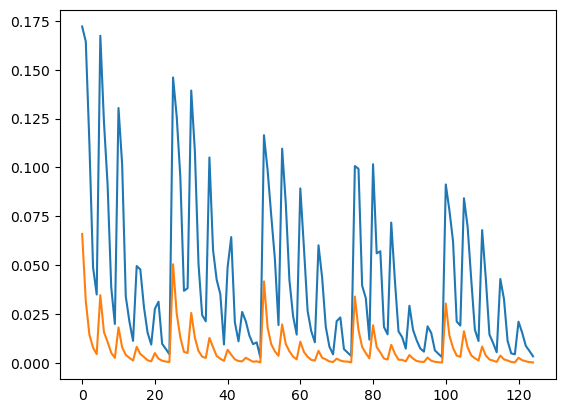

In [34]:
plt.plot(sic_e)
plt.plot(sic_m)

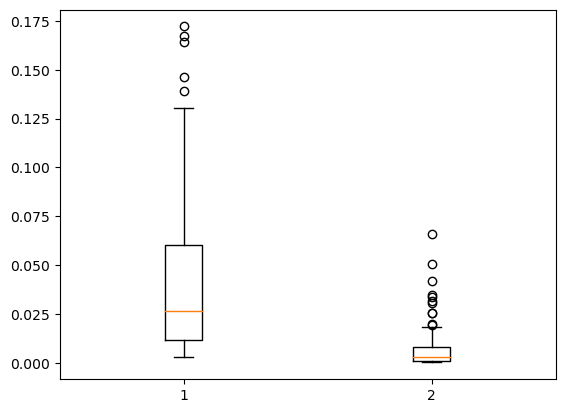

In [46]:
_=plt.boxplot(np.vstack((sic_e,sic_m)).T)

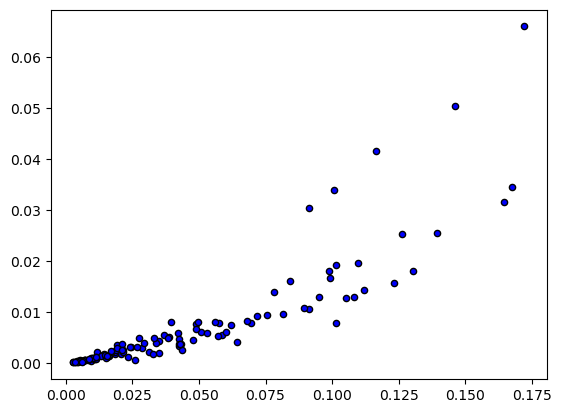

In [35]:
plt.scatter(sic_e,sic_m,s=20,fc='b',ec='k')

In [4]:
deep_reload(src)

out=src.experiments.ResultsDataFrame(results)

In [9]:
out['sic_diff']=out['sic_expected']-out['sic_mean']
out['hcl']=out['home_charger_likelihood']
out['wcl']=out['work_charger_likelihood']
out['dcl']=out['destination_charger_likelihood']

formula_e=(
    'sic_expected~'+
    'hcl*'+
    'wcl*'+
    'dcl'
)
model_e=smf.ols(formula=formula_e,data=out).fit()

formula_m=(
    'sic_mean~'+
    'hcl*'+
    'wcl*'+
    'dcl'
)
model_m=smf.ols(formula=formula_m,data=out).fit()

formula_d=(
    'sic_diff~'+
    'hcl*'+
    'wcl*'+
    'dcl'
)
model_d=smf.ols(formula=formula_d,data=out).fit()

[None, None, None]

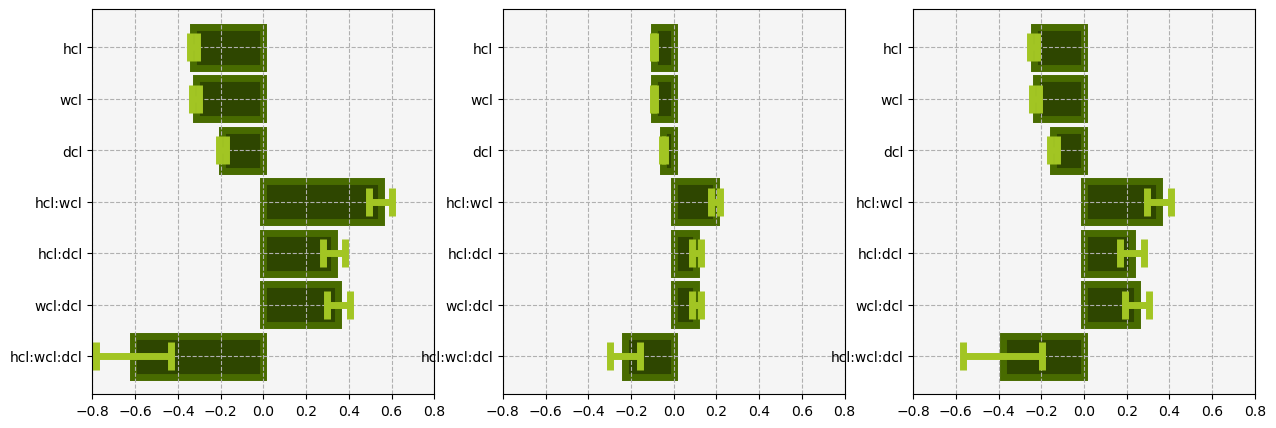

In [10]:
deep_reload(src)

cmap=src.figures.ReturnColorMap('viridis')
cs=src.figures.colors['forest']

bar_kwargs={
    'fc':cs[3],
    'ec':cs[2],
    'lw':5,
    'error_kw':{
        'ecolor':cs[1],
        'capsize':10,
        'capthick':5,
        'lw':5,
    }}

axes_kwargs={
    'facecolor':'whitesmoke',
    'xlim':[-.8,.8],
}

alpha=.05

fig,ax=plt.subplots(1,3,figsize=(15,5))

src.figures.FactorsPlot(model_e,ax=ax[0],alpha=alpha,
                        bar_kwargs=bar_kwargs,axes_kwargs=axes_kwargs)
src.figures.FactorsPlot(model_m,ax=ax[1],alpha=alpha,
                        bar_kwargs=bar_kwargs,axes_kwargs=axes_kwargs)
src.figures.FactorsPlot(model_d,ax=ax[2],alpha=alpha,
                        bar_kwargs=bar_kwargs,axes_kwargs=axes_kwargs)

[ax.grid(ls='--') for ax in ax]

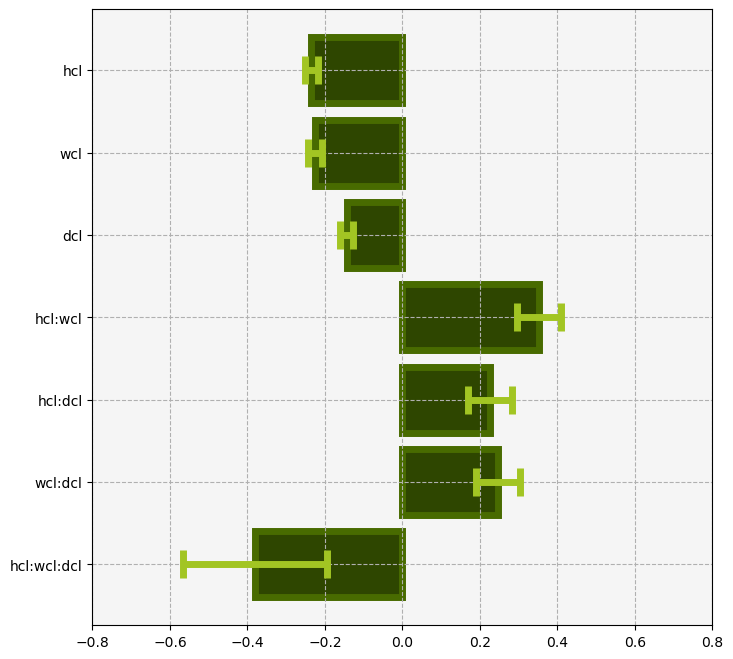

In [11]:
deep_reload(src)

cmap=src.figures.ReturnColorMap('viridis')
cs=src.figures.colors['forest']

bar_kwargs={
    'fc':cs[3],
    'ec':cs[2],
    'lw':5,
    'error_kw':{
        'ecolor':cs[1],
        'capsize':10,
        'capthick':5,
        'lw':5,
    }}

axes_kwargs={
    'facecolor':'whitesmoke',
    'xlim':[-.8,.8],
}

alpha=.05

fig,ax=plt.subplots(1,1,figsize=(8,8))

src.figures.FactorsPlot(model_d,ax=ax,alpha=alpha,
                        bar_kwargs=bar_kwargs,axes_kwargs=axes_kwargs)

ax.grid(ls='--')

In [12]:
model_e._results.rsquared_adj,model_m._results.rsquared_adj,model_d._results.rsquared_adj

(0.9305226895934059, 0.8223480233106215, 0.874558520933047)

In [15]:
deep_reload(src)

out_e=src.experiments.ExtendResultsDataFrame(out)

In [22]:
out_e['hcl']=out_e['home_charger_likelihood']
out_e['wcl']=out_e['work_charger_likelihood']
out_e['dcl']=out_e['destination_charger_likelihood']

formula=(
    'sic~'+
    'C(type)*'+
    'hcl*'+
    'wcl*'+
    'dcl'
)
model=smf.ols(formula=formula,data=out_e).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sic   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     283.0
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          1.31e-140
Time:                        10:48:19   Log-Likelihood:                 853.83
No. Observations:                 250   AIC:                            -1676.
Df Residuals:                     234   BIC:                            -1619.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0433      0.004     11.322      0.000       0.036       0.051
C(type)[T.s]                 0.1420      0.005     26.289      0.000       0.131       0.153
hcl                         -0.0922      0.012     -7.389      0.000      -0.117      -0.068
C(type)[T.s]:hcl            -0.2354      0.018    -13.339      0.000      -0.270      -0.201
wcl                         -0.0920      0.012     -7.376      0.000      -0.117      -0.067
C(type)[T.s]:wcl            -0.2258      0.018    -12.796      0.000      -0.261      -0.191
hcl:wcl                      0.1972      0.041      4.840      0.000       0.117       0.278
C(type)[T.s]:hcl:wcl         0.3511      0.058      6.092      0.000       0.238       0.465
dcl                         -0.0491      0.012     -3.931      0.000      -0.074      -0.024
C(type)[T.s]:dcl            -0.1438      0.018     -8.151      0.000      -0.179      -0.109
hcl:dcl                      0.1057      0.041      2.595      0.010       0.025       0.186
C(type)[T.s]:hcl:dcl         0.2248      0.058      3.900      0.000       0.111       0.338
wcl:dcl                      0.1049      0.041      2.575      0.011       0.025       0.185
C(type)[T.s]:wcl:dcl         0.2463      0.058      4.274      0.000       0.133       0.360
hcl:wcl:dcl                 -0.2290      0.133     -1.721      0.087      -0.491       0.033
C(type)[T.s]:hcl:wcl:dcl    -0.3799      0.188     -2.018      0.045      -0.751      -0.009
==============================================================================
Omnibus:                        8.368   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               15.114
Skew:                           0.050   Prob(JB):                     0.000523
Kurtosis:                       4.200   Cond. No.                         571.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

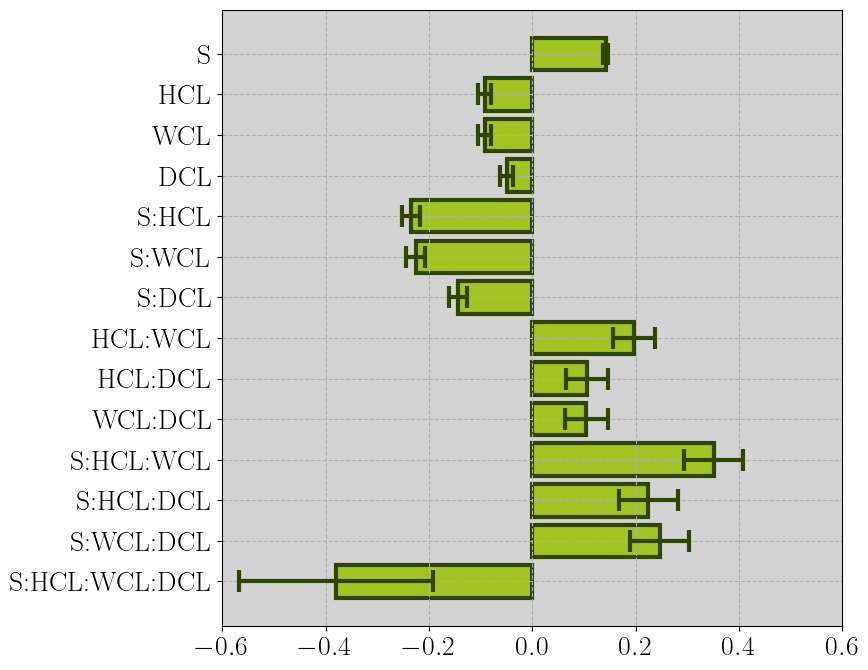

In [120]:
deep_reload(src)

cmap=src.figures.ReturnColorMap('viridis')
cs=src.figures.colors['forest']

bar_kwargs={
    'fc':cs[1],
    'ec':cs[3],
    'lw':3,
    'error_kw':{
        'ecolor':cs[3],
        'capsize':8,
        'capthick':3,
        'lw':3,
    }}

axes_kwargs={
    'facecolor':'lightgray',
    'xlim':[-.6,.6],
}

font_kwargs={
    'font.family':'Times New Roman',
    'font.size':20,
    'text.usetex':True,
}

alpha=.05

fig,ax=plt.subplots(1,1,figsize=(8,8))

src.figures.FactorsPlot(model,ax=ax,alpha=alpha,
                        bar_kwargs=bar_kwargs,axes_kwargs=axes_kwargs,
                        font_kwargs=font_kwargs,
                        label_substitutions={
                            'C(type)[T.s]':'S',
                            'hcl':'HCL',
                            'wcl':'WCL',
                            'dcl':'DCL',
                        })

ax.grid(ls='--')

fig.savefig('SAE_WCX_Paper/figs/SIC_Factors.png',dpi=300,bbox_inches='tight')

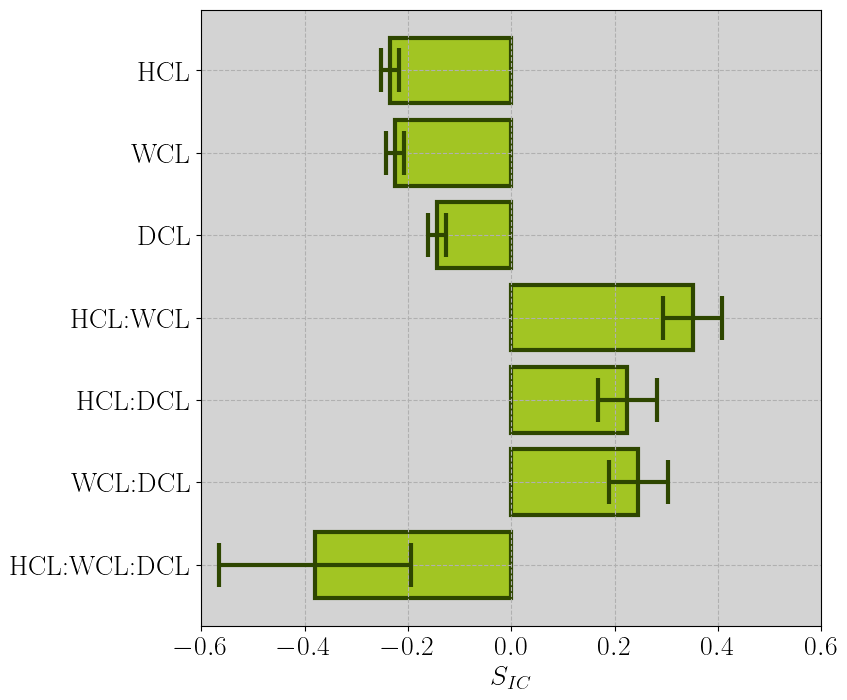

In [121]:
deep_reload(src)

cmap=src.figures.ReturnColorMap('viridis')
cs=src.figures.colors['forest']

bar_kwargs={
    'fc':cs[1],
    'ec':cs[3],
    'lw':3,
    'error_kw':{
        'ecolor':cs[3],
        'capsize':16,
        'capthick':3,
        'lw':3,
    }}

axes_kwargs={
    'facecolor':'lightgray',
    'xlabel':r'$S_{IC}$',
    'xlim':[-.6,.6],
}

font_kwargs={
    'font.family':'Times New Roman',
    'font.size':20,
    'text.usetex':True,
}

alpha=.05

fig,ax=plt.subplots(1,1,figsize=(8,8))

src.figures.FactorsPlot(model_d,ax=ax,alpha=alpha,
                        bar_kwargs=bar_kwargs,axes_kwargs=axes_kwargs,
                        font_kwargs=font_kwargs,
                        label_substitutions={
                            'C(type)[T.s]':'S',
                            'hcl':'HCL',
                            'wcl':'WCL',
                            'dcl':'DCL',
                        })

ax.grid(ls='--')

fig.savefig('SAE_WCX_Paper/figs/SIC_Diff_Factors.png',dpi=300,bbox_inches='tight')

In [129]:
deep_reload(src)

label_substitutions={
                    'C(type)[T.s]':'S',
                    'hcl':'HCL',
                    'wcl':'WCL',
                    'dcl':'DCL',
                    }

out_string=src.analysis.PrintLaTeXTabular(model,alpha=.05,
                                          label_substitutions=label_substitutions)

print(out_string)

\hline {\small Intercept } & 0.043 & 11.322 & 0.000 \\
\hline {\small S } & 0.142 & 26.289 & 0.000 \\
\hline {\small HCL } & -0.092 & -7.389 & 0.000 \\
\hline {\small WCL } & -0.092 & -7.376 & 0.000 \\
\hline {\small DCL } & -0.049 & -3.931 & 0.000 \\
\hline {\small S:HCL } & -0.235 & -13.339 & 0.000 \\
\hline {\small S:WCL } & -0.226 & -12.796 & 0.000 \\
\hline {\small S:DCL } & -0.144 & -8.151 & 0.000 \\
\hline {\small HCL:WCL } & 0.197 & 4.840 & 0.000 \\
\hline {\small HCL:DCL } & 0.106 & 2.595 & 0.010 \\
\hline {\small WCL:DCL } & 0.105 & 2.575 & 0.011 \\
\hline {\small S:HCL:WCL } & 0.351 & 6.092 & 0.000 \\
\hline {\small S:HCL:DCL } & 0.225 & 3.900 & 0.000 \\
\hline {\small S:WCL:DCL } & 0.246 & 4.274 & 0.000 \\
\hline {\small S:HCL:WCL:DCL } & -0.380 & -2.018 & 0.045 \\


In [110]:
deep_reload(src)

src.analysis.ModelANOVA(model,out_e,'sic',m=4)

13.008059190660578 0.05582858021742738
\hline R & R-Squared & Adjusted R-Squared & Std. Error \\
\hline 0.974 & 0.948 & 0.944 & 0.000 \\
\hline
\hline Category & Sum of Squares & DOF & Mean Squares \\
\hline Model & 0.287 & 15 & 0.019 \\
\hline Error & 0.016 & 234 & 0.000 \\
\hline Total & 0.303 & 249 & 0.001 \\
\hline  \multicolumn{2}{|c|}{$F$} &  \multicolumn{2}{c|}{$P(>F)$}  \\
\hline  \multicolumn{2}{|c|}{283.015} &  \multicolumn{2}{c|}{0.000}  \\
\hline


In [130]:
deep_reload(src)

out_string=src.analysis.PrintLaTeXTabular(model_d,alpha=.05,
                                          label_substitutions=label_substitutions)
print(out_string)

\hline {\small Intercept } & 0.142 & 26.709 & 0.000 \\
\hline {\small HCL } & -0.235 & -13.552 & 0.000 \\
\hline {\small WCL } & -0.226 & -13.001 & 0.000 \\
\hline {\small DCL } & -0.144 & -8.281 & 0.000 \\
\hline {\small HCL:WCL } & 0.351 & 6.190 & 0.000 \\
\hline {\small HCL:DCL } & 0.225 & 3.963 & 0.000 \\
\hline {\small WCL:DCL } & 0.246 & 4.342 & 0.000 \\
\hline {\small HCL:WCL:DCL } & -0.380 & -2.050 & 0.043 \\


In [109]:
deep_reload(src)

src.analysis.ModelANOVA(model_d,out,'sic',m=3)

18.21626210253964 0.15703674226327277
\hline R & R-Squared & Adjusted R-Squared & Std. Error \\
\hline 0.924 & 0.853 & 0.843 & 0.000 \\
\hline
\hline Category & Sum of Squares & DOF & Mean Squares \\
\hline Model & 0.120 & 7 & 0.017 \\
\hline Error & 0.030 & 117 & 0.000 \\
\hline Total & 0.207 & 124 & 0.002 \\
\hline  \multicolumn{2}{|c|}{$F$} &  \multicolumn{2}{c|}{$P(>F)$}  \\
\hline  \multicolumn{2}{|c|}{65.816} &  \multicolumn{2}{c|}{0.000}  \\
\hline


In [103]:
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sic_diff   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           3.77e-51
Time:                        13:05:45   Log-Likelihood:                 385.58
No. Observations:                 125   AIC:                            -755.2
Df Residuals:                     117   BIC:                            -732.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1420      0.005     26.709      0.000       0.132       0.153
hcl            -0.2354      0.017    -13.552      0.000      -0.270      -0.201
wcl            -0.2258      0.017    -13.001      0.000      -0.260      -0.191
hcl:wcl         0.3511      0.057      6.190      0.000       0.239       0.463
dcl            -0.1438      0.017     -8.281      0.000      -0.178      -0.109
hcl:dcl         0.2248      0.057      3.963      0.000       0.112       0.337
wcl:dcl         0.2463      0.057      4.342      0.000       0.134       0.359
hcl:wcl:dcl    -0.3799      0.185     -2.050      0.043      -0.747      -0.013
==============================================================================
Omnibus:                        3.106   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                2.708
Skew:                          -0.217   Prob(JB):                        0.258
Kurtosis:                       3.575   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""